In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [23]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [24]:
!pip install citipy

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
coordinates = list(lat_lngs)

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | quarai
Processing Record 5 of Set 1 | bethanien
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | doka
Processing Record 11 of Set 1 | cascais
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | khonuu
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | saryozek
Processing Record 19 of Set 1 | uruzgan
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | mariental
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of S

Processing Record 38 of Set 4 | cayenne
Processing Record 39 of Set 4 | loncoche
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | trairi
Processing Record 43 of Set 4 | polunochnoye
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | xining
Processing Record 46 of Set 4 | manbij
Processing Record 47 of Set 4 | pacifica
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | cockburn town
Processing Record 50 of Set 4 | saint anthony
Processing Record 1 of Set 5 | tonder
Processing Record 2 of Set 5 | cleethorpes
Processing Record 3 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | ankang
Processing Record 6 of Set 5 | jardim
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | saint george
Processing Record 9 of Set 5 | abha
Processing Record 10 of Set 5 | koslan
Processing Record 11 of Se

Processing Record 29 of Set 8 | tura
Processing Record 30 of Set 8 | pumiao
Processing Record 31 of Set 8 | torbay
Processing Record 32 of Set 8 | tuensang
Processing Record 33 of Set 8 | araouane
Processing Record 34 of Set 8 | damghan
Processing Record 35 of Set 8 | victor harbor
Processing Record 36 of Set 8 | rosarito
Processing Record 37 of Set 8 | sovetskaya gavan
Processing Record 38 of Set 8 | qasigiannguit
Processing Record 39 of Set 8 | flinders
Processing Record 40 of Set 8 | bandarbeyla
Processing Record 41 of Set 8 | padang
Processing Record 42 of Set 8 | neka
Processing Record 43 of Set 8 | wanaka
Processing Record 44 of Set 8 | artyk
City not found. Skipping...
Processing Record 45 of Set 8 | kang
Processing Record 46 of Set 8 | unguia
Processing Record 47 of Set 8 | chiang klang
Processing Record 48 of Set 8 | mabaruma
Processing Record 49 of Set 8 | salalah
Processing Record 50 of Set 8 | syamzha
Processing Record 1 of Set 9 | sur
Processing Record 2 of Set 9 | puquio


Processing Record 20 of Set 12 | tonantins
Processing Record 21 of Set 12 | itahari
City not found. Skipping...
Processing Record 22 of Set 12 | lodwar
Processing Record 23 of Set 12 | maarianhamina
Processing Record 24 of Set 12 | sidi ali
Processing Record 25 of Set 12 | dalby
Processing Record 26 of Set 12 | garmsar
Processing Record 27 of Set 12 | nouakchott
Processing Record 28 of Set 12 | shwebo
Processing Record 29 of Set 12 | bellwood
Processing Record 30 of Set 12 | jian
Processing Record 31 of Set 12 | gimli
Processing Record 32 of Set 12 | vizinga
Processing Record 33 of Set 12 | meulaboh
Processing Record 34 of Set 12 | palencia
Processing Record 35 of Set 12 | marawi
Processing Record 36 of Set 12 | cairns
Processing Record 37 of Set 12 | anadyr
Processing Record 38 of Set 12 | haines junction
Processing Record 39 of Set 12 | alta floresta
Processing Record 40 of Set 12 | yangjiang
Processing Record 41 of Set 12 | suntar
Processing Record 42 of Set 12 | roald
Processing Re

In [33]:
len(city_data)

556

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,25.79,80,0,17.27,IS,2022-02-03 18:44:09
1,Vaini,-21.2000,-175.2000,71.76,100,20,2.30,TO,2022-02-03 18:44:10
2,Carnarvon,-24.8667,113.6333,80.67,78,78,8.05,AU,2022-02-03 18:44:10
3,Quarai,-30.3875,-56.4514,75.90,78,94,18.95,BR,2022-02-03 18:44:11
4,Bethanien,-26.5020,17.1583,76.89,44,5,8.41,NA,2022-02-03 18:44:11
5,Ushuaia,-54.8000,-68.3000,47.82,61,75,14.97,AR,2022-02-03 18:44:11
6,Airai,-8.9266,125.4092,60.89,94,100,2.75,TL,2022-02-03 18:44:12
7,Jamestown,42.0970,-79.2353,31.08,55,100,12.66,US,2022-02-03 18:43:46
8,Rikitea,-23.1203,-134.9692,77.47,77,100,14.94,PF,2022-02-03 18:44:13
9,Doka,13.5167,35.7667,84.43,20,26,14.32,SD,2022-02-03 18:44:13


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,25.79,80,0,17.27,IS,2022-02-03 18:44:09
1,Vaini,-21.2000,-175.2000,71.76,100,20,2.30,TO,2022-02-03 18:44:10
2,Carnarvon,-24.8667,113.6333,80.67,78,78,8.05,AU,2022-02-03 18:44:10
3,Quarai,-30.3875,-56.4514,75.90,78,94,18.95,BR,2022-02-03 18:44:11
4,Bethanien,-26.5020,17.1583,76.89,44,5,8.41,NA,2022-02-03 18:44:11


In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643922991.615707

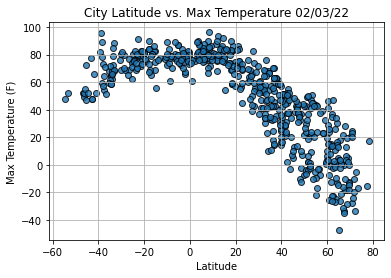

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

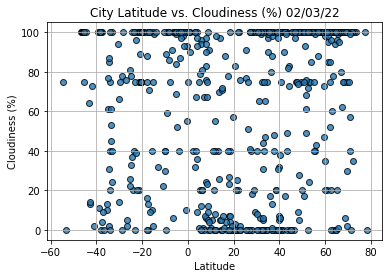

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

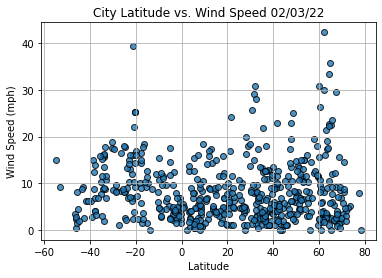

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()